In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
data=pd.read_csv("IMDB_Movies.csv")

A) DATA CLEANING
==

In [ ]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [ ]:
data.isna().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          20
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [ ]:
data.drop(["actor_1_facebook_likes","duration","actor_3_facebook_likes","language",
           "gross","facenumber_in_poster","director_facebook_likes",'cast_total_facebook_likes','movie_facebook_likes',
           'plot_keywords',"movie_imdb_link",'actor_2_facebook_likes'],axis=1,inplace=True)

In [ ]:
data.head()

,color,director_name,num_critic_for_reviews,actor_2_name,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,num_user_for_reviews,country,content_rating,budget,title_year,imdb_score,aspect_ratio
0,Color,James Cameron,723.0,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,Wes Studi,3054,USA,PG-13,237000000.0,2009.0,7.9,1.78
1,Color,Gore Verbinski,302.0,Orlando Bloom,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,Jack Davenport,1238,USA,PG-13,300000000.0,2007.0,7.1,2.35
2,Color,Sam Mendes,602.0,Rory Kinnear,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,Stephanie Sigman,994,UK,PG-13,245000000.0,2015.0,6.8,2.35
3,Color,Christopher Nolan,813.0,Christian Bale,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,Joseph Gordon-Levitt,2701,USA,PG-13,250000000.0,2012.0,8.5,2.35
4,NaN,Doug Walker,NaN,Rob Walker,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,NaN,,NaN,NaN,NaN,NaN,7.1,NaN


In [ ]:
data.isna().sum()

color                      19
director_name             104
num_critic_for_reviews     50
actor_2_name               13
genres                      0
actor_1_name                7
movie_title                 0
num_voted_users             0
actor_3_name               23
num_user_for_reviews       20
country                     5
content_rating            303
budget                    492
title_year                108
imdb_score                  0
aspect_ratio              329
dtype: int64

In [ ]:
#removing NaN value
data['color']=data['color'].fillna("color")
data.replace({"actor_2_name":np.NaN,
              "actor_3_name":np.NaN,
              "actor_1_name":np.NaN,
              "country":np.NaN,
             "content_rating":np.NaN},value="None",inplace=True)

In [ ]:
data.replace({'director_name':np.NaN},value="None",inplace=True)
data['num_critic_for_reviews']=data['num_critic_for_reviews'].fillna(value=data['num_critic_for_reviews'].mean())
data["aspect_ratio"]=data['aspect_ratio'].fillna(method='ffill')
data.drop(data.index[4],inplace=True)

In [ ]:
data['budget']=data['budget'].fillna(data['budget'].mean())

In [ ]:
data['num_user_for_reviews']=data['num_user_for_reviews'].astype('float64')
data['num_user_for_reviews']=data['num_user_for_reviews'].fillna(value=data['num_user_for_reviews'].mean())

In [ ]:
data['title_year']=data['title_year'].astype('float64')
data['title_year']=data['title_year'].fillna(value=data['num_user_for_reviews'].mean())

In [ ]:
data.head(100)

,color,director_name,num_critic_for_reviews,actor_2_name,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,num_user_for_reviews,country,content_rating,budget,title_year,imdb_score,aspect_ratio
0,Color,James Cameron,723.0,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,Wes Studi,3054.0,USA,PG-13,2.370000e+08,2009.0,7.9,1.78
1,Color,Gore Verbinski,302.0,Orlando Bloom,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,Jack Davenport,1238.0,USA,PG-13,3.000000e+08,2007.0,7.1,2.35
2,Color,Sam Mendes,602.0,Rory Kinnear,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,Stephanie Sigman,994.0,UK,PG-13,2.450000e+08,2015.0,6.8,2.35
3,Color,Christopher Nolan,813.0,Christian Bale,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,Joseph Gordon-Levitt,2701.0,USA,PG-13,2.500000e+08,2012.0,8.5,2.35
5,Color,Andrew Stanton,462.0,Samantha Morton,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,Polly Walker,738.0,USA,PG-13,2.637000e+08,2012.0,6.6,2.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Color,Christopher Nolan,712.0,Anne Hathaway,Adventure|Drama|Sci-Fi,Matthew McConaughey,Interstellar,928227,Mackenzie Foy,2725.0,USA,PG-13,1.650000e+08,2014.0,8.6,2.35
97,Color,Christopher Nolan,642.0,Tom Hardy,Action|Adventure|Sci-Fi|Thriller,Leonardo DiCaprio,Inception,1468200,Joseph Gordon-Levitt,2803.0,USA,PG-13,1.600000e+08,2010.0,8.8,2.35
98,Color,Hideaki Anno,1.0,Shin'ya Tsukamoto,Action|Adventure|Drama|Horror|Sci-Fi,Mark Chinnery,Godzilla Resurgence,374,Atsuko Maeda,13.0,Japan,None,3.975262e+07,2016.0,8.2,2.35
99,Color,Peter Jackson,645.0,Adam Brown,Adventure|Fantasy,Aidan Turner,The Hobbit: An Unexpected Journey,637246,James Nesbitt,1367.0,USA,PG-13,1.800000e+08,2012.0,7.9,2.35


In [ ]:
data.isna().sum()

color                     0
director_name             0
num_critic_for_reviews    0
actor_2_name              0
genres                    0
actor_1_name              0
movie_title               0
num_voted_users           0
actor_3_name              0
num_user_for_reviews      0
country                   0
content_rating            0
budget                    0
title_year                0
imdb_score                0
aspect_ratio              0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5042 entries, 0 to 5042
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   color                   5042 non-null   object 
 1   director_name           5042 non-null   object 
 2   num_critic_for_reviews  5042 non-null   float64
 3   actor_2_name            5042 non-null   object 
 4   genres                  5042 non-null   object 
 5   actor_1_name            5042 non-null   object 
 6   movie_title             5042 non-null   object 
 7   num_voted_users         5042 non-null   int64  
 8   actor_3_name            5042 non-null   object 
 9   num_user_for_reviews    5042 non-null   float64
 10  country                 5042 non-null   object 
 11  content_rating          5042 non-null   object 
 12  budget                  5042 non-null   float64
 13  title_year              5042 non-null   float64
 14  imdb_score              5042 non-null   

B)MOVIES WITH HIGHEST PROFIT
==

In [ ]:
profit_data=pd.read_csv("/content/drive/MyDrive/Trainity/IMDB_Movies.csv")

In [ ]:
profit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [ ]:
profit_data['budget']=profit_data['budget'].fillna(profit_data['budget'].mean())

In [ ]:
profit_data['gross']=profit_data['gross'].fillna(profit_data['gross'].mean())

In [ ]:
profit_data['Profit']=profit_data['gross']-profit_data['budget']

In [ ]:
profit_data.drop(["actor_1_facebook_likes","duration","actor_3_facebook_likes","language",
           "genres","actor_1_name","facenumber_in_poster","director_facebook_likes","cast_total_facebook_likes",
           'plot_keywords','title_year',"movie_imdb_link",'actor_2_facebook_likes','num_user_for_reviews'],axis=1,inplace=True)

In [ ]:
profit_data.isna().sum()

color                      19
director_name             104
num_critic_for_reviews     50
actor_2_name               13
gross                       0
movie_title                 0
num_voted_users             0
actor_3_name               23
country                     5
content_rating            303
budget                      0
imdb_score                  0
aspect_ratio              329
movie_facebook_likes        0
Profit                      0
dtype: int64

In [ ]:
print(profit_data)

      color      director_name  num_critic_for_reviews      actor_2_name  \
0     Color      James Cameron                   723.0  Joel David Moore   
1     Color     Gore Verbinski                   302.0     Orlando Bloom   
2     Color         Sam Mendes                   602.0      Rory Kinnear   
3     Color  Christopher Nolan                   813.0    Christian Bale   
4       NaN        Doug Walker                     NaN        Rob Walker   
...     ...                ...                     ...               ...   
5038  Color        Scott Smith                     1.0     Daphne Zuniga   
5039  Color                NaN                    43.0     Valorie Curry   
5040  Color   Benjamin Roberds                    13.0     Maxwell Moody   
5041  Color        Daniel Hsia                    14.0     Daniel Henney   
5042  Color           Jon Gunn                    43.0  Brian Herzlinger   

             gross                                        movie_title  \
0     7.605058

In [ ]:
profit_data.sort_values("Profit",ascending=False)

,color,director_name,num_critic_for_reviews,actor_2_name,gross,movie_title,num_voted_users,actor_3_name,country,content_rating,budget,imdb_score,aspect_ratio,movie_facebook_likes,Profit
0,Color,James Cameron,723.0,Joel David Moore,760505847.0,Avatar,886204,Wes Studi,USA,PG-13,2.370000e+08,7.9,1.78,33000,5.235058e+08
29,Color,Colin Trevorrow,644.0,Judy Greer,652177271.0,Jurassic World,418214,Omar Sy,USA,PG-13,1.500000e+08,7.0,2.00,150000,5.021773e+08
26,Color,James Cameron,315.0,Kate Winslet,658672302.0,Titanic,793059,Gloria Stuart,USA,PG-13,2.000000e+08,7.7,2.35,26000,4.586723e+08
3024,Color,George Lucas,282.0,Peter Cushing,460935665.0,Star Wars: Episode IV - A New Hope,911097,Kenny Baker,USA,PG,1.100000e+07,8.7,2.35,33000,4.499357e+08
3080,Color,Steven Spielberg,215.0,Dee Wallace,434949459.0,E.T. the Extra-Terrestrial,281842,Peter Coyote,USA,PG,1.050000e+07,7.9,1.85,34000,4.244495e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,Color,Katsuhiro Ôtomo,105.0,Robin Atkin Downes,410388.0,Steamboy,13727,Rosalind Ayres,Japan,PG-13,2.127520e+09,6.9,1.85,973,-2.127110e+09
2323,Color,Hayao Miyazaki,174.0,Jada Pinkett Smith,2298191.0,Princess Mononoke,221552,Billy Crudup,Japan,PG-13,2.400000e+09,8.4,1.85,11000,-2.397702e+09
3005,Color,Lajos Koltai,73.0,Péter Fancsikai,195888.0,Fateless,5603,Bálint Péntek,Hungary,R,2.500000e+09,7.1,2.35,607,-2.499804e+09
3859,Color,Chan-wook Park,202.0,Yeong-ae Lee,211667.0,Lady Vengeance,53508,Hye-jeong Kang,South Korea,R,4.200000e+09,7.7,2.35,4000,-4.199788e+09


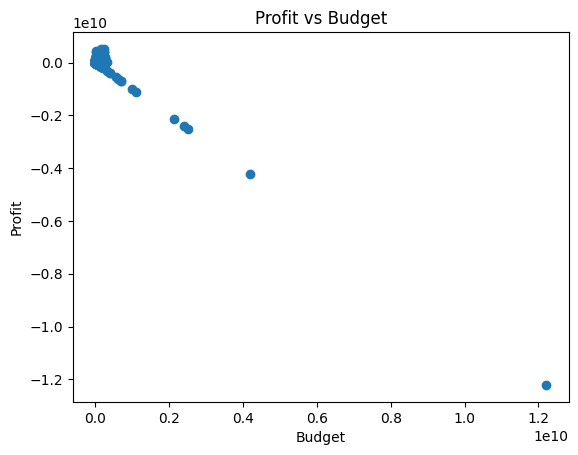

In [ ]:
plt.scatter(profit_data['budget'], profit_data['Profit'])
plt.xlabel('Budget')
plt.ylabel('Profit')
plt.title('Profit vs Budget')
plt.show()

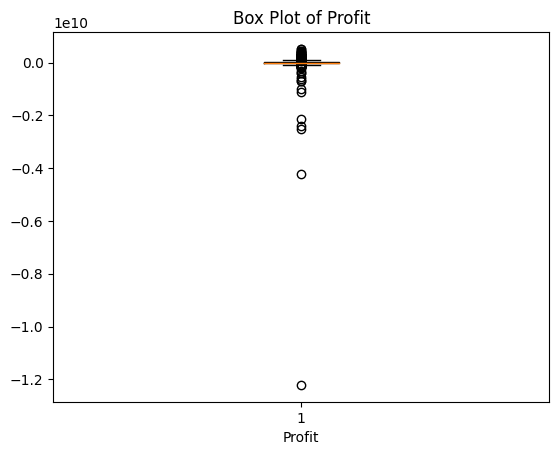

In [ ]:
plt.boxplot(profit_data['Profit'])
plt.xlabel('Profit')
plt.title('Box Plot of Profit')
plt.show()

There are 5 outliers present which are the bottom 5 movies in the dataframe sorted by profit.

In [ ]:
  profit_data.sort_values("Profit",ascending=False).tail()

,color,director_name,num_critic_for_reviews,actor_2_name,gross,movie_title,num_voted_users,actor_3_name,country,content_rating,budget,imdb_score,aspect_ratio,movie_facebook_likes,Profit
2334,Color,Katsuhiro Ôtomo,105.0,Robin Atkin Downes,410388.0,Steamboy,13727,Rosalind Ayres,Japan,PG-13,2.127520e+09,6.9,1.85,973,-2.127110e+09
2323,Color,Hayao Miyazaki,174.0,Jada Pinkett Smith,2298191.0,Princess Mononoke,221552,Billy Crudup,Japan,PG-13,2.400000e+09,8.4,1.85,11000,-2.397702e+09
3005,Color,Lajos Koltai,73.0,Péter Fancsikai,195888.0,Fateless,5603,Bálint Péntek,Hungary,R,2.500000e+09,7.1,2.35,607,-2.499804e+09
3859,Color,Chan-wook Park,202.0,Yeong-ae Lee,211667.0,Lady Vengeance,53508,Hye-jeong Kang,South Korea,R,4.200000e+09,7.7,2.35,4000,-4.199788e+09
2988,Color,Joon-ho Bong,363.0,Kang-ho Song,2201412.0,The Host,68883,Ah-sung Ko,South Korea,R,1.221550e+10,7.0,1.85,7000,-1.221330e+10


C) Top 250
==

In [ ]:
df=data.copy()

In [ ]:
df = df[df['num_voted_users'] > 25000]
df=df.sort_values("imdb_score",ascending=False)

In [ ]:
df['IMDb_Top_250'] = (df['imdb_score'].rank(ascending=False, method='first') <= 250).astype(int)

In [ ]:
df['Rank'] = df['imdb_score'].rank(ascending=False, method='first').astype(int)

In [ ]:
df.head(253)

,color,director_name,num_critic_for_reviews,actor_2_name,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,num_user_for_reviews,country,content_rating,budget,title_year,imdb_score,aspect_ratio,IMDb_Top_250,Rank
1937,Color,Frank Darabont,199.0,Jeffrey DeMunn,Crime|Drama,Morgan Freeman,The Shawshank Redemption,1689764,Bob Gunton,4144.0,USA,R,2.500000e+07,1994.000000,9.3,1.85,1,1
3466,Color,Francis Ford Coppola,208.0,Marlon Brando,Crime|Drama,Al Pacino,The Godfather,1155770,Robert Duvall,2238.0,USA,R,6.000000e+06,1972.000000,9.2,1.85,1,2
3481,Color,None,54.0,Adam Goldberg,Crime|Drama|Thriller,Kirsten Dunst,Fargo,170055,Oliver Platt,173.0,USA,TV-MA,3.975262e+07,272.770808,9.0,1.78,1,3
66,Color,Christopher Nolan,645.0,Heath Ledger,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,Morgan Freeman,4667.0,USA,PG-13,1.850000e+08,2008.000000,9.0,2.35,1,4
2837,Color,Francis Ford Coppola,149.0,Al Pacino,Crime|Drama,Robert De Niro,The Godfather: Part II,790926,Robert Duvall,650.0,USA,R,1.300000e+07,1974.000000,9.0,1.85,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4261,Black and White,Robert Rossen,100.0,Jackie Gleason,Drama|Sport,George C. Scott,The Hustler,62860,Murray Hamilton,167.0,USA,Unrated,2.000000e+06,1961.000000,8.0,2.35,1,249
1601,Color,Neill Blomkamp,472.0,Jed Brophy,Action|Sci-Fi|Thriller,Sharlto Copley,District 9,531737,Jason Cope,1262.0,South Africa,R,3.000000e+07,2009.000000,8.0,1.85,1,250
3906,Color,Richard Linklater,548.0,Lorelei Linklater,Drama,Ellar Coltrane,Boyhood,266020,Libby Villari,836.0,USA,R,4.000000e+06,2014.000000,8.0,1.85,0,251
3714,Color,Jean-Marc Vallée,471.0,Jennifer Garner,Biography|Drama,Matthew McConaughey,Dallas Buyers Club,326494,Denis O'Hare,340.0,USA,R,5.000000e+06,2013.000000,8.0,2.35,0,252


D) Best Directors
==

In [ ]:
dirdf=data.copy()

In [ ]:
dirdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5042 entries, 0 to 5042
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   color                   5042 non-null   object 
 1   director_name           5042 non-null   object 
 2   num_critic_for_reviews  5042 non-null   float64
 3   actor_2_name            5042 non-null   object 
 4   genres                  5042 non-null   object 
 5   actor_1_name            5042 non-null   object 
 6   movie_title             5042 non-null   object 
 7   num_voted_users         5042 non-null   int64  
 8   actor_3_name            5042 non-null   object 
 9   num_user_for_reviews    5042 non-null   float64
 10  country                 5042 non-null   object 
 11  content_rating          5042 non-null   object 
 12  budget                  5042 non-null   float64
 13  title_year              5042 non-null   float64
 14  imdb_score              5042 non-null   

In [ ]:
director_scores = dirdf.groupby('director_name')['imdb_score'].mean().reset_index()
director_scores = director_scores.sort_values(by=['imdb_score', 'director_name'], ascending=[False, True])

In [ ]:
top10directors = director_scores.head(10)['director_name'].tolist()
dirdf['top10director'] = dirdf['director_name'].apply(lambda x: 1 if x in top10directors else 0)

In [ ]:
dirdf.sort_values(['top10director','imdb_score','director_name'],ascending=[False,False,True]).head(10)

,color,director_name,num_critic_for_reviews,actor_2_name,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,num_user_for_reviews,country,content_rating,budget,title_year,imdb_score,aspect_ratio,top10director
2765,Color,John Blanchard,140.194272,Andrea Martin,Comedy,Martin Short,Towering Inferno,10,Joe Flaherty,272.770808,Canada,None,3.975262e+07,272.770808,9.5,1.33,1
4924,Color,Cary Bell,140.194272,Stacie Evans,Documentary,Abigail Evans,Butterfly Girl,27,Emily Gorell,1.000000,USA,None,1.800000e+05,2014.000000,8.7,1.85,1
4372,Color,Mitchell Altieri,140.194272,Luke Edwards,Comedy|Horror|Thriller,Kimberley Crossman,A Beginner's Guide to Snuff,13,Bree Williamson,272.770808,USA,None,3.975262e+07,2016.000000,8.7,2.35,1
4468,Color,Sadyk Sher-Niyaz,16.000000,Aziz Muradillayev,Action|Biography|Drama|History,Elina Abai Kyzy,Queen of the Mountains,3144,Mirlan Abdulayev,24.000000,Kyrgyzstan,PG-13,1.400000e+06,2014.000000,8.7,2.35,1
4427,Black and White,Charles Chaplin,120.000000,Stanley Blystone,Comedy|Drama|Family,Paulette Goddard,Modern Times,143086,Fred Malatesta,211.000000,USA,G,1.500000e+06,1936.000000,8.6,1.37,1
3816,Color,Mike Mayhall,140.194272,Cody Howard,Family,David Raizor,Running Forever,8,Martin Kove,272.770808,USA,None,5.000000e+06,2015.000000,8.6,2.35,1
4028,Color,Damien Chazelle,535.000000,Melissa Benoist,Drama|Music,J.K. Simmons,Whiplash,399138,Chris Mulkey,731.000000,USA,R,3.300000e+06,2014.000000,8.5,2.40,1
4921,Color,Majid Majidi,46.000000,Amir Farrokh Hashemian,Drama|Family,Bahare Seddiqi,Children of Heaven,27882,Mohammad Amir Naji,130.000000,Iran,PG,1.800000e+05,1997.000000,8.5,1.85,1
3870,Color,Raja Menon,39.000000,Sameer Ali Khan,Action|Drama|History|Thriller|War,Nimrat Kaur,Airlift,30977,Purab Kohli,178.000000,India,None,4.400000e+06,2016.000000,8.5,2.35,1
3931,Color,Ron Fricke,115.000000,Balinese Tari Legong Dancers,Documentary|Music,Collin Alfredo St. Dic,Samsara,22457,Puti Sri Candra Dewi,69.000000,USA,PG-13,4.000000e+06,2011.000000,8.5,2.35,1


In [ ]:
director_scores.head(10)

,director_name,imdb_score
1083,John Blanchard,9.5
299,Cary Bell,8.7
1619,Mitchell Altieri,8.7
2011,Sadyk Sher-Niyaz,8.7
315,Charles Chaplin,8.6
1605,Mike Mayhall,8.6
428,Damien Chazelle,8.5
1416,Majid Majidi,8.5
1835,Raja Menon,8.5
1979,Ron Fricke,8.5


E) Popular Genres
==

Popular genres according movies inthe top 250 created by the top 10 directors

In [ ]:
top250movies = df.head(250)
top10directors = director_scores['director_name'].head(10).tolist()
topmovies = top250movies[top250movies['director_name'].isin(top10directors)]

In [ ]:
genres1 = topmovies['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True)

In [ ]:
popular_genres1 = genres1.value_counts().sort_values(ascending=False)
popular_genres1

Drama       4
Family      2
Comedy      1
Action      1
History     1
Thriller    1
War         1
Music       1
dtype: int64

Genres ranked according to the top 250 movies

In [ ]:
genres2 = top250movies['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True)

In [ ]:
popular_genres2 = genres2.value_counts().sort_values(ascending=False)
popular_genres2

Drama          173
Adventure       66
Thriller        56
Crime           51
Action          50
Comedy          41
Sci-Fi          40
Romance         35
Biography       30
Fantasy         30
War             29
Mystery         28
Family          24
Animation       20
History         18
Sport            9
Horror           8
Western          8
Musical          7
Documentary      5
Music            3
Film-Noir        1
dtype: int64

F) Favourite Actors
==
A)

In [ ]:
actdata=data.copy()

In [ ]:
actdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5042 entries, 0 to 5042
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   color                   5042 non-null   object 
 1   director_name           5042 non-null   object 
 2   num_critic_for_reviews  5042 non-null   float64
 3   actor_2_name            5042 non-null   object 
 4   genres                  5042 non-null   object 
 5   actor_1_name            5042 non-null   object 
 6   movie_title             5042 non-null   object 
 7   num_voted_users         5042 non-null   int64  
 8   actor_3_name            5042 non-null   object 
 9   num_user_for_reviews    5042 non-null   float64
 10  country                 5042 non-null   object 
 11  content_rating          5042 non-null   object 
 12  budget                  5042 non-null   float64
 13  title_year              5042 non-null   float64
 14  imdb_score              5042 non-null   

In [ ]:
for index,i in actdata.iterrows():
  if i['actor_1_name'] in ["Brad Pitt","Leonardo DiCaprio","Meryl Steep"]:
    print(i['movie_title']+"--- "+i['actor_1_name'])

Titanic --- Leonardo DiCaprio
The Great Gatsby --- Leonardo DiCaprio
Inception --- Leonardo DiCaprio
The Curious Case of Benjamin Button --- Brad Pitt
Troy --- Brad Pitt
The Revenant --- Leonardo DiCaprio
Ocean's Twelve --- Brad Pitt
Mr. & Mrs. Smith --- Brad Pitt
The Aviator --- Leonardo DiCaprio
Django Unchained --- Leonardo DiCaprio
Blood Diamond --- Leonardo DiCaprio
The Wolf of Wall Street --- Leonardo DiCaprio
Gangs of New York --- Leonardo DiCaprio
The Departed --- Leonardo DiCaprio
Spy Game --- Brad Pitt
Ocean's Eleven --- Brad Pitt
Shutter Island --- Leonardo DiCaprio
Fury --- Brad Pitt
Seven Years in Tibet --- Brad Pitt
Body of Lies --- Leonardo DiCaprio
Fight Club --- Brad Pitt
Sinbad: Legend of the Seven Seas --- Brad Pitt
Catch Me If You Can --- Leonardo DiCaprio
Interview with the Vampire: The Vampire Chronicles --- Brad Pitt
The Beach --- Leonardo DiCaprio
Revolutionary Road --- Leonardo DiCaprio
The Man in the Iron Mask --- Leonardo DiCaprio
J. Edgar --- Leonardo DiCapr

In [ ]:
# create new columns for each actor and extract the movies where they were the lead actor
actdata['Meryl_Streep'] = actdata.apply(lambda row: row['movie_title'] if 'Meryl Streep' in row['actor_1_name'] else '', axis=1)
actdata['Leo_Caprio'] = actdata.apply(lambda row: row['movie_title'] if 'Leonardo DiCaprio' in row['actor_1_name'] else '', axis=1)
actdata['Brad_Pitt'] = actdata.apply(lambda row: row['movie_title'] if 'Brad Pitt' in row['actor_1_name'] else '', axis=1)


In [ ]:
actdata['Combined'] = actdata.apply(lambda row: row if (('Meryl Streep' in row['actor_1_name']) or ('Leonardo DiCaprio' in row['actor_1_name']) or ('Brad Pitt' in row['actor_1_name'])) else '', axis=1)

Finding movies for which the actors worked.

In [ ]:
actdata[actdata['actor_1_name']=='Brad Pitt'][['actor_1_name','Brad_Pitt','Combined']].head(15)

,actor_1_name,Brad_Pitt,Combined
101,Brad Pitt,The Curious Case of Benjamin Button,color ...
147,Brad Pitt,Troy,color Color di...
254,Brad Pitt,Ocean's Twelve,color Color di...
255,Brad Pitt,Mr. & Mrs. Smith,color ...
382,Brad Pitt,Spy Game,color Colo...
400,Brad Pitt,Ocean's Eleven,color Color di...
470,Brad Pitt,Fury,color Color dir...
611,Brad Pitt,Seven Years in Tibet,color ...
683,Brad Pitt,Fight Club,color Color di...
792,Brad Pitt,Sinbad: Legend of the Seven Seas,color ...


B)

In [ ]:
actor_group = data.groupby('actor_1_name')

actor_mean = actor_group[['num_critic_for_reviews', 'num_user_for_reviews']].mean()
actor_mean

,num_critic_for_reviews,num_user_for_reviews
actor_1_name,,
50 Cent,98.000000,284.000000
A.J. Buckley,298.000000,345.000000
Aaliyah,137.000000,695.000000
Aasif Mandvi,210.000000,147.000000
Abbie Cornish,270.333333,184.666667
...,...,...
Zoë Kravitz,114.666667,93.666667
Zuhair Haddad,5.000000,1.000000
Álex Angulo,9.000000,7.000000


In [ ]:
critic_df = actor_mean.sort_values('num_critic_for_reviews', ascending=False)
print(critic_df["num_critic_for_reviews"])

actor_1_name
Phaldut Sharma          738.0
Peter Capaldi           654.0
Craig Stark             596.0
Bérénice Bejo           576.0
Suraj Sharma            552.0
                        ...  
Mike Stanley              1.0
Mike Beckingham           1.0
Marcello Mastroianni      1.0
Manny Perez               1.0
Carrie Bradstreet         1.0
Name: num_critic_for_reviews, Length: 2097, dtype: float64


In [ ]:
audience_df = actor_mean.sort_values('num_user_for_reviews', ascending=False)
audience_df["num_user_for_reviews"]


actor_1_name
Heather Donahue         3400.0
Christo Jivkov          2814.0
Steve Bastoni           2789.0
Phaldut Sharma          1885.0
Keir Dullea             1736.0
                         ...  
Jon Brion                  1.0
Patrick O'Donnell          1.0
Mary Kate Wiles            1.0
Paul Hickert               1.0
Claire Gordon-Harper       1.0
Name: num_user_for_reviews, Length: 2097, dtype: float64

In [ ]:
total_df= actor_mean["num_critic_for_reviews"].add(actor_mean['num_user_for_reviews'],fill_value=0).to_frame()
total_df=total_df.sort_values(0,ascending=False)
result = total_df.head(10)
result

,0
actor_1_name,
Heather Donahue,3760.0
Christo Jivkov,3220.0
Steve Bastoni,3064.0
Phaldut Sharma,2623.0
Keir Dullea,2021.0
Chen Chang,1928.0
Nick Stahl,1780.0
Sharlto Copley,1734.0
Kevin Rankin,1712.0


C)

In [ ]:
chartdata=data.copy()
bins = [1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
labels = ['1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
chartdata['decade'] = pd.cut(chartdata['title_year'], bins=bins, labels=labels)

In [ ]:
df_by_decade = chartdata.groupby('decade')['num_voted_users'].sum().reset_index()
df_by_decade

,decade,num_voted_users
0,1920s,132420
1,1930s,1233065
2,1940s,962634
3,1950s,2175102
4,1960s,4819970
5,1970s,13740773
6,1980s,24616391
7,1990s,80028936
8,2000s,186323739
9,2010s,104763014


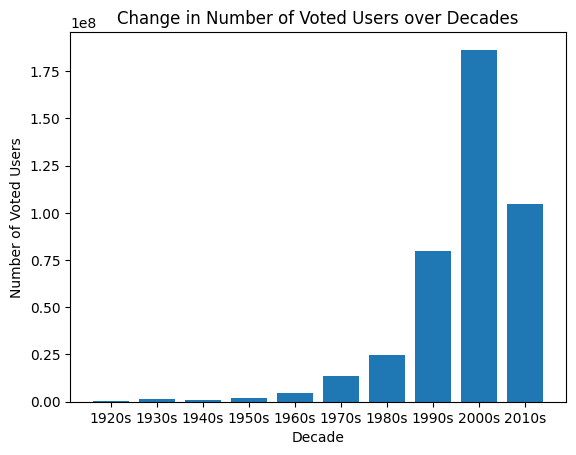

In [ ]:
plt.bar(df_by_decade['decade'], df_by_decade['num_voted_users'])
plt.xlabel('Decade')
plt.ylabel('Number of Voted Users')
plt.title('Change in Number of Voted Users over Decades')
plt.show()